<a href="https://colab.research.google.com/github/kny2609/Bigdata/blob/master/tf12_auto_encoder_test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
날짜 : 2020-08-25
이름 : 김나연
내용 : 딥러닝 오토인코더(AutoEncoder) 개념 실습하기
"""

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

tf.__version__

'2.3.0'

In [ ]:
# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
x_train[0]

In [ ]:
y_train[0]

5

In [ ]:
# 데이터 전처리
x_train = x_train.reshape(-1, 28 * 28) / 255.0
x_test = x_test.reshape(-1, 28 * 28) / 255.0

x_train.shape

(60000, 784)

In [ ]:
# 오토인코더 모델 구성
inputs = Input(shape=(784,))

hidden = Dense(32, activation='relu')(inputs)

outputs = Dense(784, activation='sigmoid')(hidden)

auto_encoder = Model(inputs, outputs)
auto_encoder.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 설정 / 학습하기
auto_encoder.compile(optimizer='adam', loss='binary_crossentropy')
auto_encoder.fit(x_train, x_train, epochs=20, batch_size=256)

Epoch 1/20
235/235 [==============================] - 2s 7ms/step - loss: 0.2752
Epoch 2/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1692
Epoch 3/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1419
Epoch 4/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1269
Epoch 5/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1166
Epoch 6/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1094
Epoch 7/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1042
Epoch 8/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1006
Epoch 9/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0982
Epoch 10/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0967
Epoch 11/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0956
Epoch 12/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0950
Epoch 13/20
235/235 [====

In [ ]:
# 예측하기
result = auto_encoder.predict(x_test)
result

array([[1.12574082e-10, 2.13891460e-10, 2.59268162e-10, ...,
        1.34872891e-10, 3.74693027e-10, 2.30489711e-10],
       [1.29802445e-11, 2.92551712e-11, 4.60821173e-11, ...,
        4.50993409e-12, 1.28988990e-11, 8.52533044e-11],
       [5.49156084e-06, 1.46794616e-06, 2.96677263e-06, ...,
        2.33571018e-06, 1.07875167e-06, 1.12611133e-06],
       ...,
       [3.70804766e-14, 1.05891807e-14, 8.11176264e-15, ...,
        1.45521429e-14, 9.64251550e-15, 1.60456907e-14],
       [4.79402846e-12, 1.60352742e-12, 1.85722076e-12, ...,
        5.18050392e-13, 7.64544623e-13, 4.44575930e-12],
       [1.59560535e-18, 3.90984329e-18, 7.77327523e-19, ...,
        4.82626263e-18, 1.63118918e-19, 3.92982011e-18]], dtype=float32)

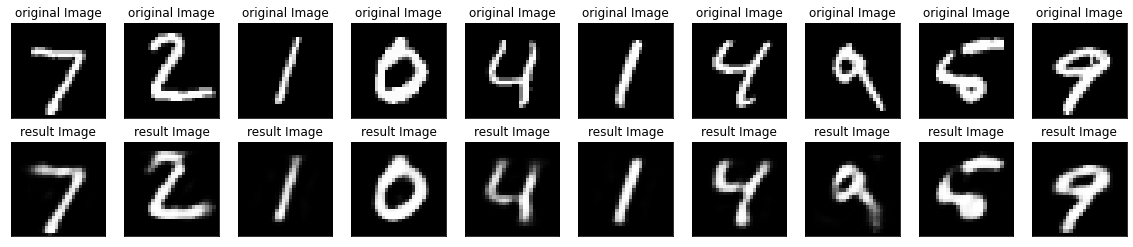

In [ ]:
# 예측값 이미지 출력
plt.figure(figsize=(20, 4))

for i in range(10):
  # original image
  ax = plt.subplot(2, 10, i+1)
  ax.set_title('original Image')
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # result image
  ax = plt.subplot(2, 10, i+11)
  ax.set_title('result Image')
  plt.imshow(result[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)